# `altair`

In [1]:
import altair as alt

# Handle large data sets by not embedding them in the notebook
alt.data_transformers.enable('data_server')

# Save a PNG blob as a backup for when the Altair plots do not render
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
import pandas as pd

gm = pd.read_csv(
    "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv",
    parse_dates=['year'])

## Bar chart

- Sort bars by value 
- Add text label next to bar chart
- Hide grid lines
- Hide grid borders

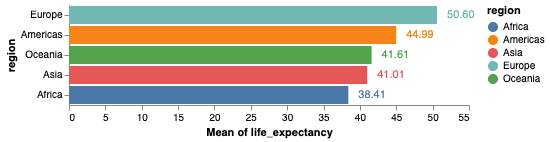

In [3]:
bar = alt.Chart(gm).mark_bar().encode(
    y=alt.Y('region', sort='-x'),
    x='mean(life_expectancy)',
    color='region'
)

text = bar.mark_text(
    align='left',
    baseline='middle',
    dx=10 
).encode(
    text=alt.Text('mean(life_expectancy)', format='0.2f')
)

((bar + text)
     .configure_axis(grid=False)
     .configure_view(strokeWidth=0)
)

### Bar chart showing polarity in values

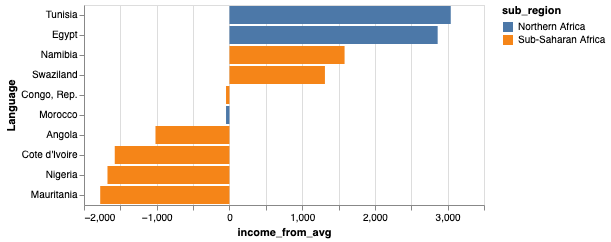

In [4]:
gm['income_from_avg'] = gm['income'] - gm.income.mean()

(alt.Chart(gm[(gm.year=='2000') & (gm.country.isin(['Tunisia', 'Egypt', 'Namibia', 'Swaziland', 'Congo, Rep.', 'Morocco', 'Angola', "Cote d'Ivoire", 'Nigeria', 'Mauritania']))])
     .mark_bar()
     .encode(
         y=alt.Y('country', sort='-x', title='Language'),
         x=alt.X('income_from_avg'),
         color=alt.Color('sub_region')
     )
)

## Histogram

- Adjust bins by max bins
- Adjust bins by range and bin size, bin step

### Adjust bins by max bins

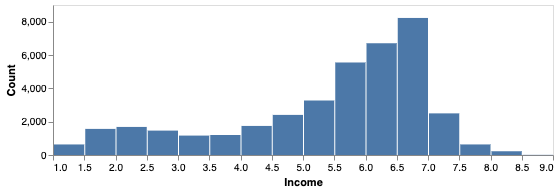

In [5]:
(alt.Chart(gm)
     .mark_bar()
     .encode(
         x=alt.X("children_per_woman:Q", title='Income',
                 bin=alt.Bin(maxbins=25)),
         y=alt.Y('count():O', title='Count')
     )
     .properties(height=150, width=500)
     .configure_axis(grid=False)
)

### Adjust bins by bin size, bin steps 

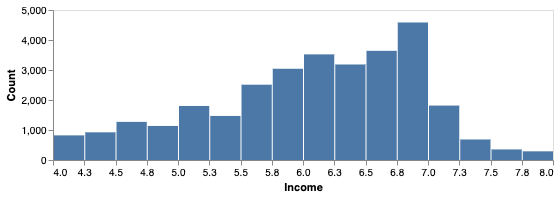

In [6]:
(alt.Chart(gm)
     .mark_bar()
     .encode(
         x=alt.X("children_per_woman:Q", 
                 bin=alt.Bin(extent=[4, 8], step=0.25),
                 title='Income'),
         y=alt.Y('count():O', title='Count')
     )
     .properties(height=150, width=500)
     .configure_axis(grid=False)
)

## Scatter plot

- Fit axis range to data points
- Add range for size scale using range 

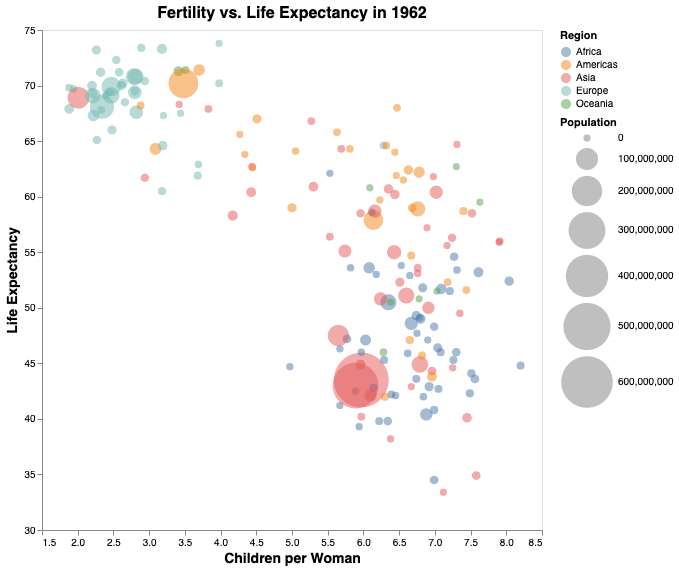

In [7]:
(alt.Chart(gm[gm['year']=="1962"],
           height=500, width=500,
           title="Fertility vs. Life Expectancy in 1962"
          )
     .mark_circle(opacity=0.5)
     .encode(
         x=alt.X('children_per_woman:Q',
                 scale=alt.Scale(zero=False),
                 title='Children per Woman'),
         y=alt.Y('life_expectancy:Q',
                 scale=alt.Scale(zero=False),
                 title='Life Expectancy'),
         color=alt.Color('region:N', 
                         legend=alt.Legend(title='Region')),
         size=alt.Size('population:Q', 
                       legend=alt.Legend(title='Population'),
                       scale=alt.Scale(range=[50, 3000]))
     )
     .configure_title(fontSize=16)
     .configure_axis(titleFontSize=14, grid=False)
)

## Line plot 

- Add point marks
- Add confidence intervals / error bands 

In [8]:
n_deaths_chart = ((gun_deaths_scatter.mark_line(color='#AA4547') +
                    alt.Chart().mark_rule(strokeDash=[5,5]).encode(x=alt.datum(2005)) +
                    gun_deaths_scatter
                   ).configure_axis(labelFontSize=15, titleFontSize=18)
                    .configure_title(fontSize=20))

# Annotate
gun_deaths_text = (alt.Chart(gun_deaths)
                             .mark_text(dx=125, dy=-115, color='black', size=15)
                             .encode(text = alt.value('2005, Gun law enacted')))


NameError: name 'gun_deaths_scatter' is not defined

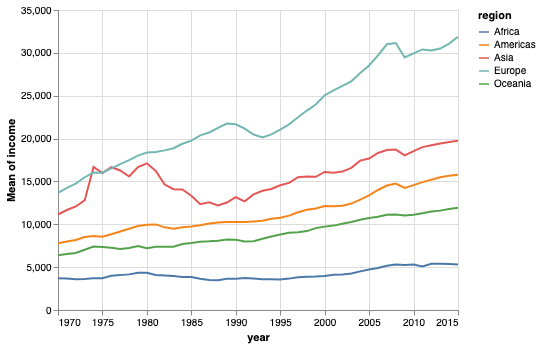

In [9]:
line = alt.Chart(
    gm[(gm['year']>='1970') & (gm['year']<='2015')] 
).mark_line().encode(
    x=alt.X('year'),
    y=alt.Y('mean(income):Q'),
    color=alt.Color('region')
)
line

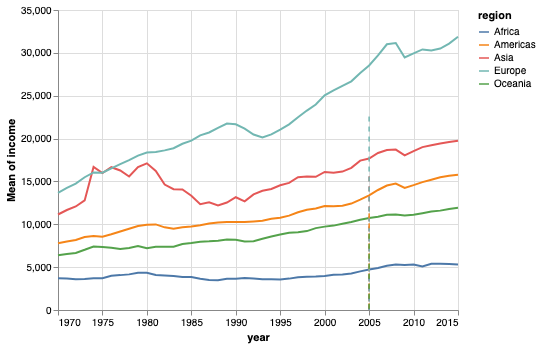

In [10]:
(line 
 + (line.mark_rule(strokeDash=[5,5], size=1.5)
    .encode(x=alt.datum(alt.DateTime(year=2005))))
)

In [ ]:
(line 
 + line.mark_rule(strokeDash=[5,5]).encode(x=alt.datum(2010))
 + (line.mark_text(dx=125, dy=-115, color='black', size=15)
    .encode(text = alt.value('2005, Gun law enacted')))
)

In [ ]:
line2 = (line
 + line.mark_square(size=20)
 + line.mark_errorband(opacity=0.2)
)

line2.configure_axis(grid=False)

### Area chart

In [ ]:
area = (alt.Chart(gm)
     .mark_area()
     .encode(
         x=alt.X('year:T'),
         y=alt.Y('sum(income):Q'),
         color=alt.Color('region')
     )
     .configure_axis(grid=False)
)

area

## Box plots 

In [ ]:
(alt.Chart(gm)
     .mark_boxplot()
     .encode(
         x=alt.X('life_expectancy:Q'),
         y='region:N'
     )
)

## Density Plot 

In [ ]:
(alt.Chart(gm)
     .transform_density('life_expectancy',
                        groupby=['region'],
                        as_=['life_expectancy', 'density'])
     .mark_area().encode(x='life_expectancy:Q',
                         y='density:Q',
                         color='region:N')
     .properties(height=100)
     .facet('region', columns=2)
     .configure_axis(grid=False)
)


In [ ]:
(alt.Chart(gm, height=100)
     .transform_density('life_expectancy',
                        groupby=['region', 'sub_region'],
                        as_=['life_expectancy', 'density'])
     .mark_area(opacity=0.3)
     .encode(x=alt.X('life_expectancy:Q'),
             y='density:Q',
             color=alt.Color('sub_region:N', legend=None))
     .facet('region', columns=2)
     .configure_axis(grid=False)
)


# Multiple Charts - Repeating, Faceting, Layering, Concatenating

## Facet charts

- Split charts into facets 
- Add title to facet 

In [ ]:
(alt.Chart(gm[gm['year'].isin(pd.to_datetime([1918, 1938, 1958, 1978, 1998, 2018], format="%Y"))])
     .mark_circle()
     .encode(
         x=alt.X('children_per_woman:Q', title='Child per Woman'),
         y=alt.Y('child_mortality:Q', title='Child Mortality'),
         color=alt.Color('income_group:O', 
                         sort=["High", "Upper middle", "Lower middle", "Low"],
                         scale=alt.Scale(scheme='tableau10'),
                         legend=alt.Legend(title='Income Group')))
     .properties(height=150, width=180)
     .facet(facet=alt.Facet('year(year):T', title="Year"), 
            columns=3)
     .configure_axis(grid=False)
)

# EDA

## Pairwise scatter plot of numerical variables

In [ ]:
numeric_cols = ['life_expectancy', 'child_mortality', 'children_per_woman', 'years_in_school_women']

(alt.Chart(gm[gm.year=='2000'],
           width=150, height=150)
     .mark_point(opacity=0.3, size=10)
     .encode(
         x=alt.X(alt.repeat('row'), type='quantitative', scale=alt.Scale(zero=False)),
         y=alt.Y(alt.repeat('column'), type='quantitative', scale=alt.Scale(zero=False)),
         color='region'
     )
     .repeat(
         column=numeric_cols,
         row=numeric_cols
     )
     .configure_axis(grid=False)
)


### Categorical variables

In [ ]:
gm.explode('income_group').explode('region')

(alt.Chart(gm.explode('income_group').explode('region'),
           width=300, height=300)
     .mark_square()
     .encode(
         x=alt.X('income_group:N', title="Income Group"),
         y=alt.Y('region:N', title="Region"),
         color='count()',
         size=alt.Size('count()', scale=alt.Scale(range=[0, 2000])))
)


## Heatmap

In [ ]:
(alt.Chart(gm)
    .mark_rect()
     .encode(
        alt.X('years_in_school_women', bin=alt.Bin(maxbins=20)),
        alt.Y('children_per_woman', bin=alt.Bin(maxbins=20)),
        alt.Color('count()')))

In [ ]:
import altair as alt
import pandas as pd

langs = pd.read_csv('data/languages.csv')

points_syl_info = (alt.Chart(langs)
                   .mark_circle()
                   .encode(
                       x=alt.X('information_density', 
                               title='Information density',
                               scale=alt.Scale(zero=False)),
                       y=alt.Y('distinct_syllables', 
                               title='Distinct syllables',
                               scale=alt.Scale(zero=False)),
                       color=alt.Color('continent', title='Continent')
                   ).properties(
                       title='A. Information Density vs. Distinct Syllables'
                   )
                  )

line_syl_info = (points_syl_info.transform_regression(
    'information_density', 'distinct_syllables', groupby=['continent']).mark_line())

syl_info_plot = points_syl_info + line_syl_info

# Show the plot
syl_info_plot


In [ ]:
brush = alt.selection_interval()

syl_info_plot = (points_syl_info.encode(
    color=alt.condition(brush, 'continent', alt.value('lightgray'), title='Continent'),
    tooltip='language'
).properties(
    title='A. Information Density vs. Distinct Syllables'
) + line_syl_info).add_selection(brush)

syl_info_plot

In [ ]:
spoken_texts = pd.read_csv('data/spoken-texts.csv')

# Calculate average speech rate
spoken_texts['speech_rate'] = spoken_texts['syllables'] / spoken_texts['duration']
avg_speech_rate = spoken_texts.groupby('iso_lang').mean().loc[:, ['speech_rate']]


spoken_texts = spoken_texts.merge(
    langs.loc[:,['iso_lang', 'information_density', 'continent']],
    how='left', on='iso_lang')

# You can do additional wrangling before this step
spoken_texts['information_rate'] = spoken_texts['information_density'] * spoken_texts['speech_rate']

info_rate_order = spoken_texts.groupby('iso_lang').mean().sort_values('information_rate').index.to_list()

# The order of this layered plot should be individual observations + error_bars + means
lang_info_ticks = (alt.Chart(spoken_texts)
                  .mark_tick(opacity=0.5)
                  .encode(
                      y=alt.Y('iso_lang', title='Language ISO Code'),
                      x=alt.X('information_rate', scale=alt.Scale(zero=False),
                              title='Information Rate'
                             )
                  ).properties(
                      title='C. Information Rate by Language'
                  ))

lang_info_plot = (lang_info_ticks.encode(color=alt.Color('continent', title='Continent'))
                  + (lang_info_ticks.mark_errorbar(
                      extent='ci', rule=alt.LineConfig(size=2), color='black')
                    )
                  + (lang_info_ticks.mark_circle(size=25, color='black')
                     .encode(x=alt.X('mean(information_rate)', sort=info_rate_order)
                    )))

# Show the plot
lang_info_plot

In [ ]:
final_figure = ((syl_info_plot.properties(width=200, height=200)
                 & speech_info_plot.properties(width=200,height=200) 
                ) | lang_info_plot.properties(width=400, height=500))

# Command to save this plot as an svg
# final_figure.save('final_figure.svg')

# Show the plot
final_figure

In [ ]:
by_speaker_intervals = (alt.Chart(spoken_texts_by_speaker)
                      .mark_errorbar()
                      .encode(
                          x=alt.X('information_density', 
                                  title='Information Density',
                                  scale=alt.Scale(zero=False)
                                 ),
                          y=alt.Y('speech_rate', title='Speech Rate',
                                  scale=alt.Scale(zero=False)
                                 ),
                          color=alt.Color('continent', title='Continent')
                      ))

# Show the plot
(by_speaker_intervals + speech_info_plot).properties(title='B1. Information Density vs. Speech Rate')

# Themes, Color Palettes

In [ ]:
for t in alt.themes.names():
    alt.themes.enable(t)
    print(t.upper())
    line2.display()